# Visualisation Masterlcass
This is a "Jupyter Notebook", formerly an IPython Notebook, but now you can get notebooks that run R, Julia, Fortran, etc

### These are great for documenting and visualising you analysis pipelines.

## Let's start!



In [1]:
#Python is an programming language.
#Here is some python code where we are telling Python to load some libraries we will use.

import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
#Use '%pylab' for interactive plots
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


## You could perhaps write an abstract here
### or an introduction to a paper. 
# Very cool. 
We are just going to use this opportunity to say, let's load in some all about gambling in the Premier League!

We downloaded these data on the command line using these bash commands:


In [2]:
#Load in the datasets into panda dataframes

#We have several data sets that we will stitch together
df1=pd.read_csv('/Users/nbutter/Code/Bantz/2011_E0.csv',  skipinitialspace=False)
df2=pd.read_csv('/Users/nbutter/Code/Bantz/2012_E0.csv',  skipinitialspace=False)
df3=pd.read_csv('/Users/nbutter/Code/Bantz/2013_E0.csv',  skipinitialspace=False)
df4=pd.read_csv('/Users/nbutter/Code/Bantz/2014_E0.csv',  skipinitialspace=False)
df5=pd.read_csv('/Users/nbutter/Code/Bantz/2015_E0.csv',  skipinitialspace=False)
df6=pd.read_csv('/Users/nbutter/Code/Bantz/2016_E0.csv',  skipinitialspace=False)
df7=pd.read_csv('/Users/nbutter/Code/Bantz/2010_E0.csv',  skipinitialspace=False)
df8=pd.read_csv('/Users/nbutter/Code/Bantz/2009_E0.csv',  skipinitialspace=False)
df9=pd.read_csv('/Users/nbutter/Code/Bantz/2008_E0.csv',  skipinitialspace=False)
df10=pd.read_csv('/Users/nbutter/Code/Bantz/2017_E0.csv',  skipinitialspace=False)

#Print the shape of one of the datasets
print(df1.shape)

frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]
# frames = [df10]
betdata = pd.concat(frames,ignore_index=True)

#Print the shape of the entire thing
print(betdata.shape)

#Get the length of the dataset and save it
sLength = len(betdata['FTHG'])

(380, 71)
(3660, 80)


Now let's just have a look at our data, get an idea of what is inside it. Print out a range of the different columns and variables available within our 3660x80=292,800 sized dataset.

In [3]:
print('\n Data columns')
print(betdata.columns.values)
print('\n Example rows')
print(betdata[2:7])
print('\n Teams')
print(betdata.HomeTeam.unique())
print('\n')
print(betdata.HomeTeam)
print(betdata[betdata['HomeTeam'].isnull()])


 Data columns
['AC' 'AF' 'AR' 'AS' 'AST' 'AY' 'AwayTeam' 'B365A' 'B365D' 'B365H' 'BSA'
 'BSD' 'BSH' 'BWA' 'BWD' 'BWH' 'Bb1X2' 'BbAH' 'BbAHh' 'BbAv<2.5' 'BbAv>2.5'
 'BbAvA' 'BbAvAHA' 'BbAvAHH' 'BbAvD' 'BbAvH' 'BbMx<2.5' 'BbMx>2.5' 'BbMxA'
 'BbMxAHA' 'BbMxAHH' 'BbMxD' 'BbMxH' 'BbOU' 'Date' 'Div' 'FTAG' 'FTHG'
 'FTR' 'GBA' 'GBD' 'GBH' 'HC' 'HF' 'HR' 'HS' 'HST' 'HTAG' 'HTHG' 'HTR' 'HY'
 'HomeTeam' 'IWA' 'IWD' 'IWH' 'LBA' 'LBD' 'LBH' 'PSA' 'PSCA' 'PSCD' 'PSCH'
 'PSD' 'PSH' 'Referee' 'SBA' 'SBD' 'SBH' 'SJA' 'SJD' 'SJH' 'Unnamed: 65'
 'Unnamed: 66' 'Unnamed: 67' 'VCA' 'VCD' 'VCH' 'WHA' 'WHD' 'WHH']

 Example rows
   AC  AF  AR  AS  AST  AY    AwayTeam  B365A  B365D  B365H  ...   SJH  \
2   3  12   0  15    6   4  Sunderland    7.0   3.60   1.57  ...   1.5   
3   5  11   1   9    4   5     Arsenal    2.1   3.25   3.75  ...   4.0   
4   2  16   0  13    7   2      Bolton    3.0   3.25   2.40  ...   2.3   
5   3   8   0  13    3   2     Norwich    3.5   3.20   2.20  ...   2.1   
6   6  12   0  

# We need a plan for this more complicated dataset.
#### Let's extract and group various variables that might be interesting to show.

In [5]:
#Create a new column for storing the "Winning Team Odds"
betdata['WTO'] = pd.Series(np.zeros(sLength), index=betdata.index)

#Make arrays for each of the three outcomes 
#HT win
a = betdata.loc[betdata['FTHG'] > betdata['FTAG'], 'WTO'] 
betdata.ix[a.index.values,'WTO'] = betdata.ix[a.index.values,'B365H']

#AT win
b = betdata.loc[betdata['FTHG'] < betdata['FTAG'], 'WTO'] 
betdata.ix[b.index.values,'WTO'] = betdata.ix[b.index.values,'B365A']

#Draw
c = betdata.loc[betdata['FTHG'] == betdata['FTAG'], 'WTO'] 
betdata.ix[c.index.values,'WTO'] = betdata.ix[c.index.values,'B365D']

#Now make a copy of the data with one sorted by WTO
betdata['ColumnNum'] = betdata.index
betdata2 = betdata.sort_values(by=['WTO','B365H', 'B365A'])
betdata2 = betdata2.reset_index()
betdata2['ColumnNum2'] = betdata2.index

#And create a vector for each of the three outcomes
aa = betdata2.loc[betdata2['FTHG'] > betdata2['FTAG']]
bb = betdata2.loc[betdata2['FTHG'] < betdata2['FTAG']]
cc = betdata2.loc[betdata2['FTHG'] == betdata2['FTAG']] 


In [6]:
# plotdataY=chemdata[chemdata.CU > 200][['SIO2']].values
# plotdataX=betdata['WTO'].values

# print(c.index.values, cc.index.values)
# print(betdata2.loc[0:30,['WTO','B365H','B365A','B365D','FTHG','FTAG']])
# print(betdata2.loc[cc.index.values,['WTO','B365H','B365A','B365D','FTHG','FTAG']])

# print(betdata2['ColumnNum2'],betdata2['ColumnNum'])
# print(betdata.ix[c.index.values,'B365D'],\
#       betdata.loc[c.index.values,'B365H'].values,\
#       betdata.loc[c.index.values,'B365A'].values)

In [7]:
#Number of rows (i.e. no of games played)
noRows = betdata.shape[0]

#Here we create various combinations of metrics
#The way you count can change the results slightly.
#e.g. should you include the favourite when the draw is actually the favourite result?

#Using aa sorts them by odds, using a is just order game played in season
# vector a is the index of betting odds when home team won
HwinHwin = betdata.loc[aa.index.values,'WTO'].values
HwinHwinInd = betdata2.loc[aa.index.values,'WTO'].index.values

# vector b is the index of betting odds when away team won
AwinAwin = betdata.loc[bb.index.values,'WTO'].values
AwinAwinInd = betdata2.loc[bb.index.values,'WTO'].index.values

# vector c is the index of betting odds when a draw won
drawDraw = betdata.loc[c.index.values,'WTO'].values
drawDrawInd = betdata2.loc[cc.index.values,'WTO'].index.values

#A vector for when the drawn games that win have higher odds than the Win or Loss result
bigDrawBool = (betdata2.loc[cc.index.values,'B365D'] > betdata2.loc[cc.index.values,'B365H']) & \
        (betdata2.loc[cc.index.values,'B365D'] > betdata2.loc[cc.index.values,'B365A'])
    
bigDrawInd = bigDrawBool[bigDrawBool]

#A vector for when the drawn games that win have higher odds than the Win or Loss result
bigDrawBoolU = (betdata2.loc[cc.index.values,'B365D'] < betdata2.loc[cc.index.values,'B365H']) ^ \
        (betdata2.loc[cc.index.values,'B365D'] < betdata2.loc[cc.index.values,'B365A'])
    
bigDrawIndU = bigDrawBoolU[bigDrawBoolU]


#Vector of favourites (when favourite is a draw) winning (I don't think this happens) 
drawFavBool = (betdata['WTO'] < betdata['B365H']) & \
        (betdata['WTO'] < betdata['B365A'])
    
drawFavInd = drawFavBool[drawFavBool]


#Vector of favourites winning
FavBool = (betdata['WTO'] <= betdata['B365D']) & \
        (betdata['WTO'] <= betdata['B365H']) & \
        (betdata['WTO'] <= betdata['B365A'])
    
FavInd = FavBool[FavBool]

#Vector of draws winning
FavDBool = (betdata['WTO'] == betdata['B365D']) 

FavDInd = FavDBool[FavDBool]
        
#Vector of underdogs winning
FavUBool = (betdata['WTO'] >= betdata['B365D']) & \
        (betdata['WTO'] >= betdata['B365H']) & \
        (betdata['WTO'] >= betdata['B365A'])
    
FavUInd = FavUBool[FavUBool]

#Vector of Home favourites winning
HomeFavBool = (betdata['WTO'] == betdata['B365H']) & \
        (betdata['WTO'] < betdata['B365A'])
    
HomeFavInd = HomeFavBool[HomeFavBool]

noHomeFavs = (betdata['B365H'] < betdata['B365A'])
noHomeFavs = np.shape(noHomeFavs[noHomeFavs])[0]
    
#Vector of Home underdogs winning
HomeUndBool = (betdata['WTO'] == betdata['B365H']) & \
        (betdata['WTO'] > betdata['B365A'])
    
HomeUndInd = HomeUndBool[HomeUndBool]

noHomeUnd = (betdata['B365H'] > betdata['B365A']) 
noHomeUnd = np.shape(noHomeUnd[noHomeUnd])[0]

    
#Vector of Away favourites winning
AwayFavBool = (betdata['WTO'] == betdata['B365A']) & \
        (betdata['WTO'] < betdata['B365H'])
    
AwayFavInd = AwayFavBool[AwayFavBool]

noAwayFavs = (betdata['B365A'] < betdata['B365H'])
noAwayFavs = np.shape(noAwayFavs[noAwayFavs])[0]

#Vector of Away underdogs winning
AwayUndBool = (betdata['WTO'] == betdata['B365A']) & \
        (betdata['WTO'] > betdata['B365H'])
    
AwayUndInd = AwayUndBool[AwayUndBool]

noAwayUnd = (betdata['B365A'] > betdata['B365H'])
noAwayUnd = np.shape(noAwayUnd[noAwayUnd])[0]


#Vector of draw both to score
drawBothScoreBool = (betdata['FTHG'] == betdata['FTAG']) & \
                    (betdata['FTHG'] > 0)
    
drawBothScoreInd = drawBothScoreBool[drawBothScoreBool]

noRest=(betdata['B365H'] == betdata['B365A']) 
noRest = np.shape(noRest[noRest])[0]





# print(drawDrawInd,drawDraw)
# print(cc.index.values)
# print(betdata.loc[cc.index.values,'WTO'])
# print(betdata.loc[c.index.values,'WTO'])
# chemdata[chemdata.CU > 200][['TI']].values

# print(bigDrawInd)
# print(betdata.loc[a.index.values,'WTO'].values)

# print(bigDrawInd.index.values)
# print(betdata.loc[bigDrawInd.index.values,'B365H'].values)


#     if ((row > drawHwin[index]) and (row > drawAwin[index])):
#         drawBig[index] = row
#         print(drawHwin[index],drawDraw[index],drawAwin[index])

# bigDraw = betdata.loc[c.index.values,'WTO'].values > \
    # betdata.loc[c.index.values,'B365H'].values

# Boring boring boring
## Hurry up and visualise the data! 
Okay, but we need to think about this. 

If we want to come up with a "System" to spend our excessive PhD stipends on we actually need a research question, hypothesis, something! 

The data might help shape this as we learn more though... Let's plot something!

In [8]:
#Make some datasets to plot
XDrawValues = betdata2['B365D'].values
XHomeWin = betdata2['B365H'].values
XAwayWin = betdata2['B365A'].values
XWinTeamOdds = betdata2['WTO'].values

x = np.arange(0, noRows, 1)

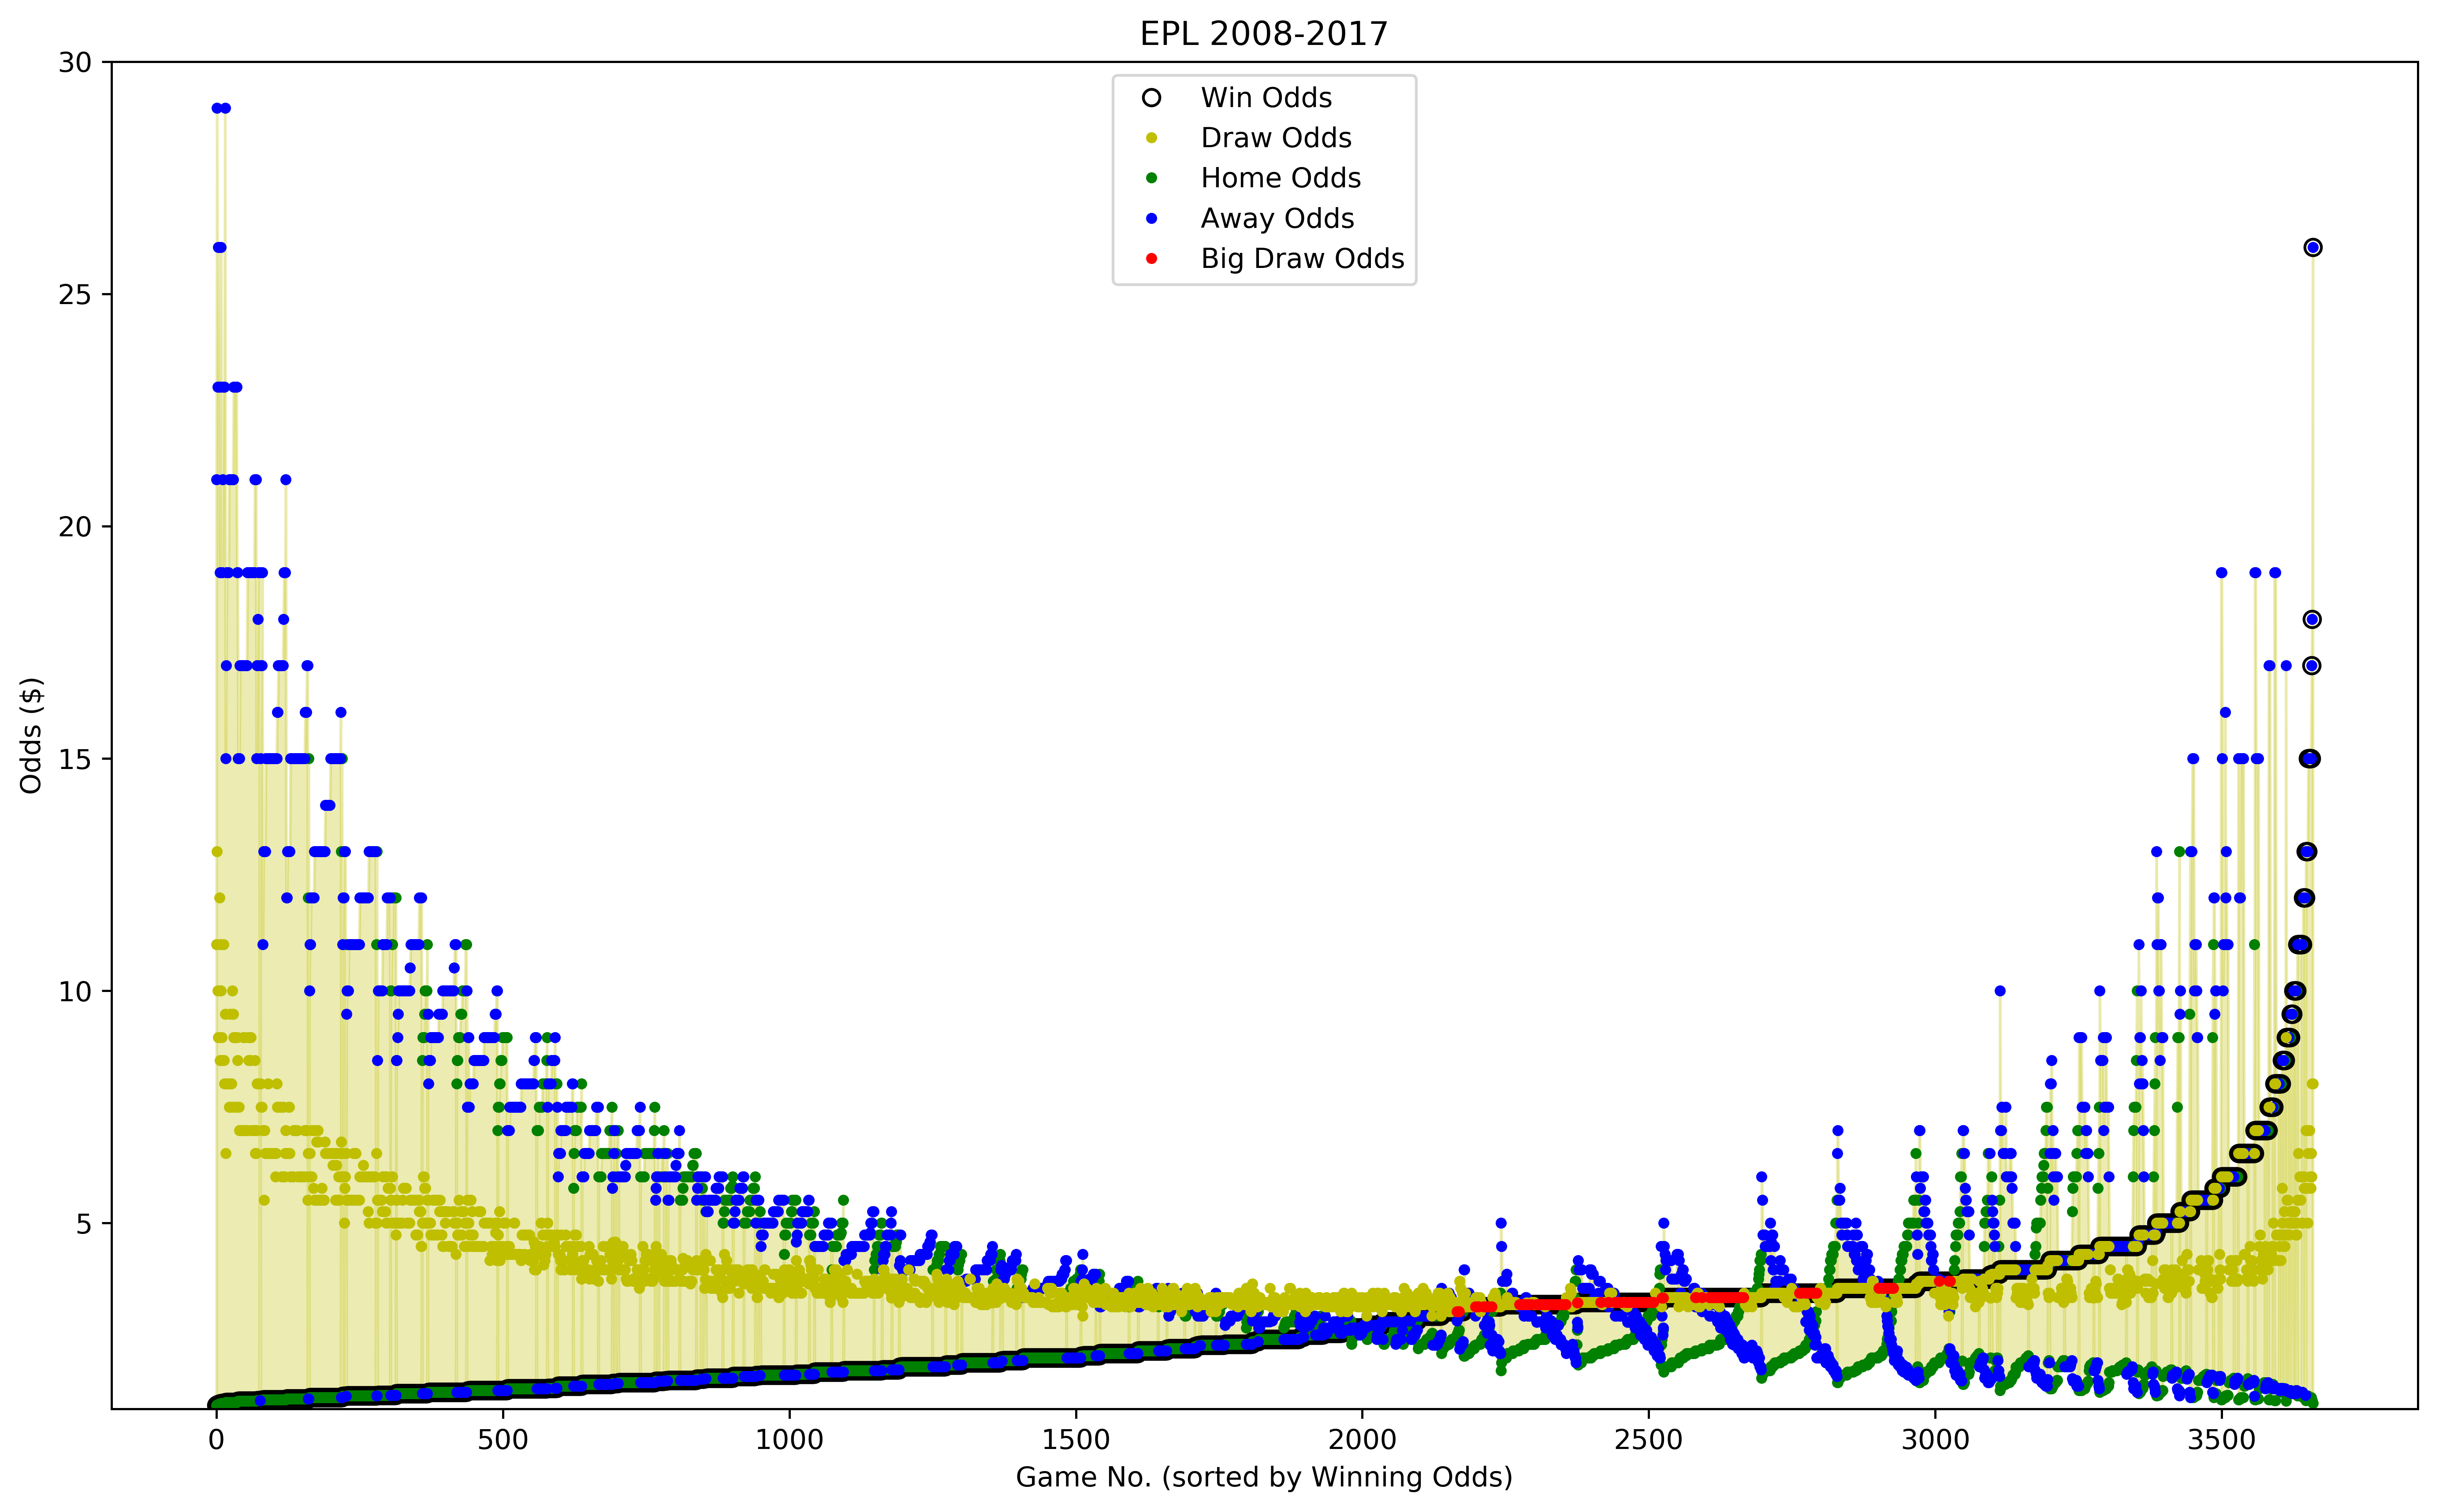

In [11]:
fig = plt.figure(figsize=(15,9),dpi=450)

#FIRST
#Plot the actual odds of the result
plt2, = plt.plot(XWinTeamOdds,'ko',fillstyle='none')

#SECOND
#Plot the home wins and away wins
plt4, = plt.plot(XHomeWin,'g.')
plt5, = plt.plot(XAwayWin,'b.')

# #FOURTH
plt3, = plt.plot(XDrawValues,'y.')

# #FIFTH
# #Plot the Home and Win team Odds Range
pylab.fill_between(x,betdata2['B365H'].values,betdata2['B365A'].values,\
                   color='y',alpha=0.3)

plt6, = plt.plot(bigDrawInd.index.values,betdata2.loc[bigDrawInd.index.values,'WTO'].values,'r.')

plt.legend([plt2,plt3,plt4,plt5,plt6],['Win Odds','Draw Odds','Home Odds', 'Away Odds', 'Big Draw Odds'])

#######
#Clean Up the Plot
axes = plt.gca()
# axes.set_xlim([0,3500])
axes.set_ylim([1,30])

axes.set_xlabel('Game No. (sorted by Winning Odds)')
axes.set_ylabel('Odds ($)')

plt.title("EPL 2008-2017")# +filename[-11:-7])





# Sometimes a plot might not be the best way to visualise our data
Just write it down instead..

In [12]:
#Favourite win percent. If you always bet on the favourite
p1=np.shape(FavInd)[0]/noRows * 100.0
p1_sum = np.sum(betdata.loc[FavInd.index,'WTO'])
print('Favourite win percent: {0:.0f}% or {1:.0f}/{2:.0f} games'.format(p1,np.shape(FavInd)[0],noRows))
print('If you bet $1 on the favourite every game')
print('You would bet ${0:.0f} and get ${1:.2f} back'.format(noRows,p1_sum))
print('A return of ${0:.0f}, or {1:.1f}%'.format(p1_sum-noRows,100.*(p1_sum/noRows-1)))

Favourite win percent: 54% or 1991/3660 games
If you bet $1 on the favourite every game
You would bet $3660 and get $3567.40 back
A return of $-93, or -2.5%


#### This is a rich dataset, with many pertubations and combinations of visualisaing and learning something from it. 
These notebooks are good because we can re-run our workflow a million times now.

### Allow your data exploration to guide your research question. 

In [10]:

#Vector of Home greater than $2 winning
HomeGR2Bool = (betdata['WTO'] == betdata['B365D']) & \
        (betdata['WTO'] > betdata['B365A']) & \
        (betdata['WTO'] > betdata['B365H'])
    
HomeGR2Ind = HomeGR2Bool[HomeGR2Bool]

DrawDraw =(betdata['B365D'] > betdata['B365A']) & \
        (betdata['B365D'] > betdata['B365H'])
    
DrawDraw = DrawDraw[DrawDraw]

NoDrawDraw = np.shape(DrawDraw)[0]
NoDrawDrawWin = np.shape(HomeGR2Ind)[0]

# print(NoDrawDraw)
# print(NoDrawDrawWin)

#Home underdog win percent. When the underdog is the one playing at home and they win.
#as a percentage of all the games. And as a dollar value of when you would actually bet
p7=np.shape(HomeGR2Ind)[0]/noHomeGR2 * 100.0
p7_sum = np.sum(betdata.loc[HomeGR2Ind.index,'B365D'])
print('\nPercent of draws that win and have odds between win/loss: {0:.0f}% or {1:.0f}/{2:.0f} games'\
      .format(p7,NoDrawDrawWin,NoDrawDraw))
print('If you bet $1 each time the draw was more than the win/loss result')
print('You would bet ${0:.0f} and get ${1:.2f} back'.format(NoDrawDraw,p7_sum))
print('A return of ${0:.0f}, or {1:.1f}%'.format(p7_sum-NoDrawDraw,100.*(p7_sum/NoDrawDraw-1)))




#Vector of Home greater than $2 winning
HomeGR2Bool = (betdata['WTO'] == betdata['B365H']) & \
        (betdata['WTO'] > 2.0)
    
HomeGR2Ind = HomeGR2Bool[HomeGR2Bool]

noHomeGR2 = (betdata['B365H'] > 2.0) 
    
noHomeGR2 = np.shape(noHomeGR2[noHomeGR2])[0]

#Home underdog win percent. When the underdog is the one playing at home and they win.
#as a percentage of all the games. And as a dollar value of when you would actually bet
p11=np.shape(HomeGR2Ind)[0]/noHomeGR2 * 100.0
p11_sum = np.sum(betdata.loc[HomeGR2Ind.index,'B365H'])
print('\nHome when odds > $2 win, percent: {0:.0f}% or {1:.0f}/{2:.0f} games'\
      .format(p11,np.shape(HomeGR2Ind)[0],noHomeGR2))
print('If you bet $1 each time the home team was fav and > $2 odds')
print('You would bet ${0:.0f} and get ${1:.2f} back'.format(noHomeGR2,p11_sum))
print('A return of ${0:.0f}, or {1:.1f}%'.format(p11_sum-noHomeGR2,100.*(p11_sum/noHomeGR2-1)))

NameError: name 'noHomeGR2' is not defined

In [ ]:
noRows


In [ ]:
# FavBool = (betdata['WTO'] >= betdata['B365D']) & \
#         (betdata['WTO'] >= betdata['B365H']) & \
#         (betdata['WTO'] >= betdata['B365A'])
    
# FavInd = FavBool[FavBool]

print('Home Favs',noHomeFavs)
print('Away Favs',noAwayFavs)

print('Home Unde',noHomeUnd)
print('Away Unde',noAwayUnd)
print(noRest)
print('Ho+Aw Fav',noHomeFavs+noAwayFavs+noRest)
print('Ho+Aw Und',noHomeUnd+noAwayUnd+noRest)
print('Total Gam',noRows)
print(HomeFavInd.index)
# print(c.index)

# print(betdata.loc[0:17,['WTO','B365H','B365D','B365A','FTHG','FTAG']])
# print(np.sum(betdata.loc[FavInd.index,'B365H']))

In [ ]:
#Favourite win percent. If you always bet on the favourite
p1=np.shape(FavInd)[0]/noRows * 100.0
p1_sum = np.sum(betdata.loc[FavInd.index,'WTO'])
print('Favourite win percent: {0:.0f}% or {1:.0f}/{2:.0f} games'.format(p1,np.shape(FavInd)[0],noRows))
print('If you bet $1 on the favourite every week')
print('You would bet ${0:.0f} and get ${1:.2f} back'.format(noRows,p1_sum))
print('A return of ${0:.0f}, or {1:.1f}%'.format(p1_sum-noRows,100.*(p1_sum/noRows-1)))

#Underdog win percent. If you always bet on the underdog (i.e. the win/loss with the highest odds)
p1u=np.shape(FavUInd)[0]/noRows * 100.0
p1u_sum = np.sum(betdata.loc[FavUInd.index,'WTO'])
print('\n Underdog win percent: {0:.0f}% or {1:.0f}/{2:.0f} games'.format(p1u,np.shape(FavUInd)[0],noRows))
print('If you bet $1 on the underdog every week')
print('You would bet ${0:.0f} and get ${1:.2f} back'.format(noRows,p1u_sum))
print('A return of ${0:.0f}, or {1:.1f}%'.format(p1u_sum-noRows,100.*(p1u_sum/noRows-1)))

#Home Win Percent.
p2=np.shape(a)[0]/noRows*100.0
p2_sum = np.sum(betdata.loc[a.index,'WTO'])
print('\nHome Win Percent: {0:.0f}% or {1:.0f}/{2:.0f} games'.format(p2,np.shape(a)[0],noRows))
print('If you bet $1 on the Home Team winning every week')
print('You would bet ${0:.0f} and get ${1:.2f} back'.format(noRows,p2_sum))
print('A return of ${0:.0f}, or {1:.1f}%'.format(p2_sum-noRows,100.*(p2_sum/noRows-1)))

#Away Win Percent
p3=np.shape(b)[0]/noRows*100.0
p3_sum = np.sum(betdata.loc[b.index,'WTO'])
print('\nAway Win Percent: {0:.0f}% or {1:.0f}/{2:.0f} games'.format(p3,np.shape(b)[0],noRows))
print('If you bet $1 on the Away Team winning every week')
print('You would bet ${0:.0f} and get ${1:.2f} back'.format(noRows,p3_sum))
print('A return of ${0:.0f}, or {1:.1f}%'.format(p3_sum-noRows,100.*(p3_sum/noRows-1)))

#Draw Percent
p4=np.shape(c)[0]/noRows*100.0
p4_sum = np.sum(betdata.loc[c.index,'WTO'])
print('\nDraw Percent: {0:.0f}% or {1:.0f}/{2:.0f} games'.format(p4,np.shape(c)[0],noRows))
print('If you bet $1 on the draw every week')
print('You would bet ${0:.0f} and get ${1:.2f} back'.format(noRows,p4_sum))
print('A return of ${0:.0f}, or {1:.1f}%'.format(p4_sum-noRows,100.*(p4_sum/noRows-1)))

#Home Favourite win percent. When the favourite is the one playing at home and they win.
#as a percentage of all the games. And as a dollar value of when you would actually bet
p5=np.shape(HomeFavInd)[0]/noRows * 100.0
p5_sum = np.sum(betdata.loc[HomeFavInd.index,'B365H'])
print('\nHome Favourite win percent: {0:.0f}% or {1:.0f}/{2:.0f} games'.format(p5,np.shape(HomeFavInd)[0],noRows))
print('If you bet $1 each time the home team was the favourite')
print('You would bet ${0:.0f} and get ${1:.2f} back'.format(noHomeFavs,p5_sum))
print('A return of ${0:.0f}, or {1:.1f}%'.format(p5_sum-noHomeFavs,100.*(p5_sum/noHomeFavs-1)))

#Home underdog win percent. When the underdog is the one playing at home and they win.
#as a percentage of all the games. And as a dollar value of when you would actually bet
p5u=np.shape(HomeUndInd)[0]/noRows * 100.0
p5u_sum = np.sum(betdata.loc[HomeUndInd.index,'B365H'])
print('\nHome Underdog win percent: {0:.0f}% or {1:.0f}/{2:.0f} games'.format(p5u,np.shape(HomeUndInd)[0],noRows))
print('If you bet $1 each time the home team was the underdog')
print('You would bet ${0:.0f} and get ${1:.2f} back'.format(noHomeUnd,p5u_sum))
print('A return of ${0:.0f}, or {1:.1f}%'.format(p5u_sum-noHomeUnd,100.*(p5u_sum/noHomeUnd-1)))


#Away Favourite win percent
p6=np.shape(AwayFavInd)[0]/noRows * 100.0
p6_sum = np.sum(betdata.loc[AwayFavInd.index,'B365A'])
print('\nAway Favourite win percent: {0:.0f}%'.format(p6))
print('If you bet $1 each time the away team was the favourite')
print('You would bet ${0:.0f} and get ${1:.2f} back'.format(noAwayFavs,p6_sum))
print('A return of ${0:.0f}, or {1:.1f}%'.format(p6_sum-noAwayFavs,100.*(p6_sum/noAwayFavs-1)))

#Away underdog win percent. When the underdog is the one playing away and they win.
#as a percentage of all the games. And as a dollar value of when you would actually bet
p6u=np.shape(AwayUndInd)[0]/noRows * 100.0
p6u_sum = np.sum(betdata.loc[AwayUndInd.index,'B365A'])
print('\nAway Underdog win percent: {0:.0f}%'.format(p6u))
print('If you bet $1 each time the Away team was the underdog')
print('You would bet ${0:.0f} and get ${1:.2f} back'.format(noAwayUnd,p6u_sum))
print('A return of ${0:.0f}, or {1:.1f}%'.format(p6u_sum-noAwayUnd,100.*(p6u_sum/noAwayUnd-1)))


# This is broken
# ###DRAWS USE BETDATA2!!!
# #Draw with big odds as percentage of draws
# p7=np.shape(bigDrawInd)[0]/np.shape(c)[0]*100.0
# p7_sum=np.sum(betdata2.loc[bigDrawInd.index,'WTO'])
# print('\nPercent of draws that win and have better odds than win/loss: {0:.0f}% or {1:.0f}/{2:.0f} games'.\
#       format(p7,np.shape(bigDrawInd)[0],np.shape(c)[0]))
# print('If you bet $1 each time the draw was higher odds than both win and loss')
# print('You would bet ${0:.0f} and get ${1:.0f} back'.format(np.shape(bigDrawInd)[0],p7_sum))
# print('A return of ${0:.0f}, or {1:.1f}%'.format(p7_sum-np.shape(bigDrawInd)[0],100.\
#                                                  *(p7_sum/np.shape(bigDrawInd)[0]-1)))

###DRAWS USE BETDATA2!!!
#Draw when odds are between win and loos
nonBigDrawNo=noRows-np.shape(bigDrawInd)[0]
p7u=nonBigDrawNo/np.shape(c)[0]*100.0
p7u_sum=np.sum(betdata2.loc[bigDrawIndU.index,'B365D'])
print('\nPercent of draws that win and have odds between win/loss: {0:.0f}%'.format(p7u))
print('If you bet $1 each time the draw was between the win/loss odds')
print('You would bet ${0:.0f} and get ${1:.2f} back'.format(nonBigDrawNo,p7u_sum))
print('A return of ${0:.0f}, or {1:.1f}%'.format(p7u_sum-nonBigDrawNo,100.\
                                                 *(p7u_sum/nonBigDrawNo-1)))

#Percent of draw both to score happening
p8=np.shape(drawBothScoreInd)[0]/np.shape(c)[0]*100.0
print('\nPercent of draws (of total DRAWS) that have both teams scoring: {0:.0f}%'.format(p8))

#Percent of draw both to score happening
p9=np.shape(drawBothScoreInd)[0]/noRows*100.0
print('\nPercent of draws (of total GAMES) that have both teams scoring: {0:.0f}%'.format(p9))


#Total number of games
p10=np.shape(a)[0] + np.shape(b)[0] + np.shape(c)[0]
print('Total number of games: {0:.0f}'.format(p10))
print('Total number of games: {0:.0f}'.format(noRows))


#Determine dollar values associated with eaach

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
drawlabel='Draw: \n${0:.0f} return'.format(p4_sum)
homelabel='Home Win: \n${0:.0f} return'.format(p2_sum)
awaylabel='Away Win: \n${0:.0f} return'.format(p3_sum)

labels = drawlabel, homelabel, awaylabel
sizes = [p4, p2, p3]
explode = (0.05, 0.05, 0.05)  # only "explode" the 2nd slice (i.e. 'Hogs')

myred='#e41a1c'
myblue='#377eb8'
mygreen='#4daf4a'

#b g r
myblue2='#a6cee3'
myblue='#1f78b4'
mygreen2='#b2df8a'
mygreen='#33a02c'
myred2='#fb9a99'
myred='#e31a1c'

#diverging colors
#fc8d59
#ffffbf
#91bfdb

my_color=[myred,mygreen,myblue]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0, colors=my_color)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

bigdrawlabel='Draw (Odds > Win/Loss): \n${0:.0f} outlay, \${1:.0f} return'.format(NoDrawDraw,p7_sum)
homelabel='Home Win (when favourite): \n${0:.0f} outlay, \${1:.0f} return'.format(noHomeFavs,p5_sum)
awaylabel='Away Win (when favourite): \n${0:.0f} outlay, \${1:.0f} return'.format(noAwayFavs,p6_sum)

#The next 3 labels need to be made from another vector
drawlabel='Draw (normal): \n${0:.0f} outlay, \${1:.0f} return'.format(nonBigDrawNo,p7u_sum)
homeUlabel='Home Win (when underdog): \n${0:.0f} outlay, \${1:.0f} return'.format(noHomeUnd,p5u_sum)
awayUlabel='Away Win (when underdog): \n${0:.0f} outlay, \${1:.0f} return'.format(noAwayUnd,p6u_sum)

labels=bigdrawlabel,drawlabel,homelabel,homeUlabel,awaylabel,awayUlabel

# labels = 'Draw Odds are greater\n than Win/Loss result','Draws', ' ',\
#         'Home Team Favourite\n and Wins', 'Home Team Underdog\n and Wins',' ',\
#         'Away Team Favourite\n and Wins', 'Away Team Underdog\n and Wins', ' '

# p7 BigDraw
# p8 DrawBothScore
# p9 DrawBothScore / Total
#p5 home fav
#p6 away fav

p_bigdraw = p4*p7/100
p_drawBScore = p4*p8/100
p_drawBScoreTot = p4*p9/100

p_homeFav = p2-p5
p_awayFav = p3-p6

p0=0.5

# autopct=make_autopct(sizes)
# def make_autopct(values):
#     def my_autopct(pct):
#         total = sum(values)
#         val = int(round(pct*total/100.0))
#         return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
#     return my_autopct

print(p_awayFav,p6)
#the favourite team when they are playing away team wins 14%. The away team wins 31% of the time
# When the away team is the favourite and playing away this is only 4% of all games

sizes = [p_bigdraw, p4-p_bigdraw, p5, p2-p5, p6, p3-p6,] 
value = [p_bigdraw, p4-p_bigdraw, p2, p3] 
explode = (0, 0, 0, 0, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, \
        shadow=True, startangle=0,colors=[myred2,myred,mygreen2,mygreen,myblue2,myblue],autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:

labels = bigdrawlabel,' '

everything = p4-p_bigdraw + p5 + p2-p5 + p6 + p3-p6

sizes = [p_bigdraw, everything] 
explode = (0.05, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, \
        shadow=True, startangle=0,colors=[myred2, 'lightgrey'],autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Draw value is greater than Win/Loss','+additional \n draws',\
        'Win/Loss'
# p7 BigDraw
# p8 DrawBothScore
# p9 DrawBothScore / Total
#p5 home fav
#p6 away fav

p_bigdraw = p4*p7/100

print(p_bigdraw + p4-p_bigdraw + p2+p3)

sizes = [p_bigdraw, p4-p_bigdraw, p2+p3] 
explode = (0, 0,0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,
        shadow=True, startangle=0,colors=[myred2,myred,'lightgrey'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Draw both to Score','0-0 draws',\
        'Win/Loss'
# p7 BigDraw
# p8 DrawBothScore
# p9 DrawBothScore / Total
#p5 home fav
#p6 away fav

p0=0.5

#Should add to 100
print(p9 + p4-p9 + p2+p3)

sizes = [p9, p4-p9, p2+p3] 
explode = (0, 0,0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,
        shadow=True, startangle=0,colors=[myred2,myred,'lightgrey'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# drawArr = np.column_stack((drawHwin, drawDraw, drawAwin))
    
fig = plt.figure(figsize=(15,9),dpi=450)



XDrawValues = betdata2['B365D'].values
XHomeWin = betdata2['B365H'].values
XAwayWin = betdata2['B365A'].values

x = np.arange(0, noRows, 1)

#Plot the Home and Win team Odds Range
pylab.fill_between(x,betdata2['B365H'].values,betdata2['B365A'].values,\
                   color='y',alpha=0.3)



#######
# Now Plot the actual odds of the result
XWinTeamOdds = betdata2['WTO'].values
plt2, = plt.plot(XWinTeamOdds,'ko',fillstyle='none')


#Plot the Draw Odds
plt3, = plt.plot(XDrawValues,'y.')
plt4, = plt.plot(XHomeWin,'g.')
plt5, = plt.plot(XAwayWin,'b.')

#Plot the odds when it was a draw
# plt.plot(drawDrawInd,drawDraw,'r.')
# Plot the winning draws when the draw odds were greater than eihter team win/lise odds
plt6, = plt.plot(bigDrawInd.index.values,betdata2.loc[bigDrawInd.index.values,'WTO'].values,'r.')

#Plot the odds when it was a Home win
# plt.plot(HwinHwinInd,HwinHwin,'b.')

#Plot the odds when it was an Away Win
# plt.plot(AwinAwinInd,AwinAwin,'g.')

#######
#Clean Up the Plot
axes = plt.gca()
# axes.set_xlim([0,3500])
# axes.set_ylim([1,30])

# axes.set_xlim([120,220])
# axes.set_ylim([1,4])

axes.set_xlabel('Game No. (sorted by Winning Odds)')
axes.set_ylabel('Odds ($)')

plt.title("EPL 2008-2017")# +filename[-11:-7])

plt.legend([plt2,plt3,plt4,plt5,plt6],['Win Odds','Draw Odds','Home Odds', 'Away Odds', 'Big Draw Odds'])

##Add stats. Percentage of Favourites winning/losing. PErcentage of draws. Draws both to score

In [ ]:
# print(betdata2[['WTO','B365H','B365A','B365D','FTHG','FTAG']])

In [ ]:
plotdataY=betdata['WTO'].values

fig = plt.figure(figsize=(16,12),dpi=150)
plt.plot(plotdataY,'r.')
plt.show()

In [ ]:
#Is the favourite winning
a = betdata.loc[betdata['FTHG'] > betdata['FTAG'], 'WTO'] 
betdata.ix[a.index.values,'WTO'] = betdata.ix[a.index.values,'B365H']

b = betdata.loc[betdata['FTHG'] < betdata['FTAG'], 'WTO'] 
betdata.ix[b.index.values,'WTO'] = betdata.ix[b.index.values,'B365A']

c = betdata.loc[betdata['FTHG'] == betdata['FTAG'], 'WTO'] 
betdata.ix[c.index.values,'WTO'] = betdata.ix[c.index.values,'B365D']